In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from config import FILE_PATH_INPUTS, HMM_FEATURE_COLS
from src.data_loader import load_macro_data
from src.regime_model import estimate_regimes

In [1]:
import os
import sys

# From notebooks/ go one level up to the project root (where src/ and config.py live)
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root:", project_root)
print("src in root?", os.path.isdir(os.path.join(project_root, "src")))
print("config in root?", os.path.isfile(os.path.join(project_root, "config.py")))


Project root: c:\Users\XiliWangMainSkyAsset\OneDrive - MainSky\Dokumente\Codes\FI
src in root? True
config in root? True


In [4]:
data = load_macro_data(FILE_PATH_INPUTS)

regime_result = estimate_regimes(
    data=data,
    feature_cols=HMM_FEATURE_COLS,
    span=3,
    n_components_list=(2, 3, 4),
    random_state=42,
)

hmm = regime_result["hmm"]
n_states = regime_result["n_states"]
bic = regime_result["bic"]
X = regime_result["X"]
posteriors = regime_result["posteriors"]
post_smooth = regime_result["posteriors_smooth"]
state_profile = regime_result["state_profile"]
state_mapping = regime_result["state_mapping"]

print(f"Selected number of states by BIC: {n_states}, BIC = {bic:.2f}")
print("\nPosterior-weighted state characteristics:")
print(state_profile)
print("\nState labels:")
for state_name, label in state_mapping.items():
    print(f"  {state_name}: {label}")

c:\Users\XiliWangMainSkyAsset\OneDrive - MainSky\Dokumente\Codes\FI\src\data_loader.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.set_index("Date").asfreq("M")


Selected number of states by BIC: 4, BIC = 3463.40

Posterior-weighted state characteristics:
         VIX_MonthlyAvg  MOVE Proxy (σ Δ10Y, ann.)     HY OAS    IG OAS  \
State 0       15.327783                   0.645581   6.319493  1.149540   
State 1       26.201690                   1.016585  11.283165  1.818876   
State 2       44.185328                   1.587467  16.020524  4.751621   
State 3       19.472382                   0.940725   8.068326  1.259533   

         Slope_10Y_3M  
State 0      1.136351  
State 1      1.615703  
State 2      2.561929  
State 3      1.199054  

State labels:
  State 0: Carry-Friendly
  State 3: Volatility Transition
  State 1: Defensive
  State 2: Capital-Protection Mode


In [5]:
data_regime = data.copy()

for i in range(n_states):
    col_name = f"State_{i}"
    data_regime[col_name] = None
    data_regime.loc[post_smooth.index, col_name] = post_smooth[col_name]

state_labels_ordered = [state_mapping[f"State {i}"] for i in range(n_states)]


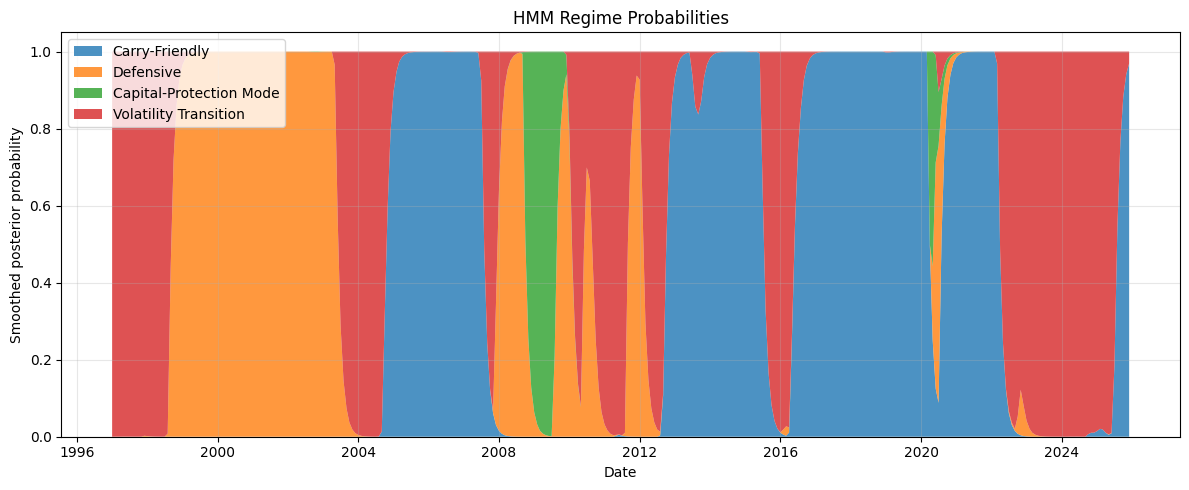

In [6]:
plt.figure(figsize=(12, 5))

plt.stackplot(
    post_smooth.index,
    post_smooth.values.T,
    labels=state_labels_ordered,
    alpha=0.8,
)

plt.title("HMM Regime Probabilities")
plt.xlabel("Date")
plt.ylabel("Smoothed posterior probability")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
